In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.metrics import r2_score

In [2]:
df1 = pd.read_excel('dataset2train.xlsx')
df2 = pd.read_excel('dataset2test.xlsx')
df1 = df1.dropna()
print("Training Dataset Shape -----> ",df1.shape)

Training Dataset Shape ----->  (697, 3)


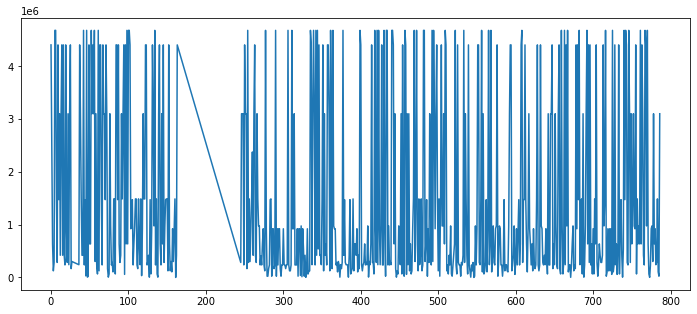

In [3]:
df1['Foreign_Visitors'].plot(figsize=(12,5))


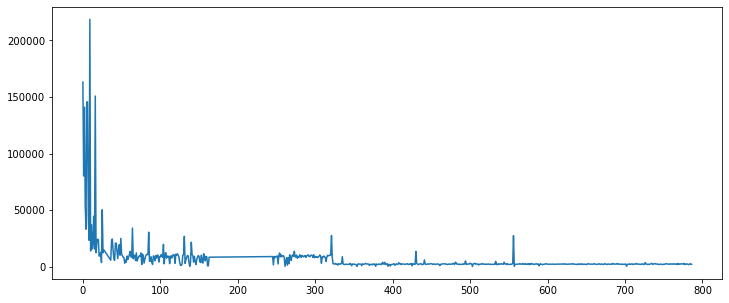

In [4]:
df1['Covid_Cases'].plot(figsize=(12,5))

In [5]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Lags : ", dftest[2])
    print("4. obs. used for ADF regression and critical value calculation : ", dftest[3])
    print("5. Critical values : ")
    for key,val in dftest[4].items():
        print("\t", key, ": ", val)

In [6]:
ad_test(df1['Foreign_Visitors'])

1. ADF :  -11.075457704430491
2. P-Value :  4.444247345783798e-20
3. Lags :  3
4. obs. used for ADF regression and critical value calculation :  693
5. Critical values : 
	 1% :  -3.4398214107097225
	 5% :  -2.8657196436385663
	 10% :  -2.5689957624690525


In [7]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [8]:
stepwise_fit = auto_arima(df1['Foreign_Visitors'], trace = True, supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21929.275, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22389.581, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22180.694, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21926.461, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22387.582, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21928.450, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=21933.271, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21928.628, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=21924.060, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=21926.012, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=21923.317, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=21924.927, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=21923.495, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=21922.575, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -10953.638
Date:                Mon, 14 Sep 2020   AIC                          21919.277
Time:                        18:39:11   BIC                          21946.549
Sample:                             0   HQIC                         21929.822
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0893      0.045    -24.403      0.000      -1.177      -1.002
ar.L2         -0.9550      0.044    -21.554      0.000      -1.042      -0.868
ma.L1          0.1229      0.052      2.354      0.019       0.021       0.225
ma.L2         -0.1415      0.050     -2.844      0.004      -0.239      -0.044
ma.L3         -0.9251      0.049    -18.749      0.000      -1.022      -0.828
sigma2      2.973e+12   1.79e-15   1.66e+27      0.000    2.97e+12    2.97e+12
===================================================================================
Ljung-Box (Q):                       30.20   Jarque-Bera (JB):               124.93
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             1.02
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.72e+43. Standard errors may be unstable.
"""

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
print(df1.shape)
train = df1.iloc[:]
test = df2.iloc[:]
print(train.shape,test.shape)

(697, 3)
(697, 3) (501, 2)


In [11]:
model = ARIMA(train['Foreign_Visitors'],order = (1,0,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Foreign_Visitors   No. Observations:                  697
Model:                     ARMA(1, 5)   Log Likelihood              -10966.720
Method:                       css-mle   S.D. of innovations        1648194.789
Date:                Mon, 14 Sep 2020   AIC                          21949.440
Time:                        18:39:12   BIC                          21985.814
Sample:                             0   HQIC                         21963.503
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.458e+06   7.45e+04     19.578      0.000    1.31e+06     1.6e+06
ar.L1.Foreign_Visitors    -0.1397      0.886     -0.158      0.875      -1.877       1.598
ma.L1.Foreign_Visitors     0.1447      0.886      0.163      0.870      -1.592       1.882
ma.L2.Foreign_Visitors     0.0359      0.039      0.919      0.358      -0.041       0.112
ma.L3.Foreign_Visitors     0.1068      0.049      2.179      0.029       0.011       0.203
ma.L4.Foreign_Visitors     0.0917      0.099      0.925      0.355      -0.103       0.286
ma.L5.Foreign_Visitors    -0.0187      0.085     -0.221      0.825      -0.185       0.147
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.1583           +0.0000j            7.1583            0.5000
MA.1           -1.4425           -1.0034j            1.7571           -0.4033
MA.2           -1.4425           +1.0034j            1.7571            0.4033
MA.3            0.9001           -1.4427j            1.7004           -0.1612
MA.4            0.9001           +1.4427j            1.7004            0.1612
MA.5            5.9827           -0.0000j            5.9827           -0.0000
-----------------------------------------------------------------------------
"""

In [12]:
start = len(train)
end = len(train)+len(test) - 1
pred = model.predict(start=start, end=end)
print(pred)

697     1.354577e+06
698     1.291844e+06
699     1.575577e+06
700     1.622689e+06
701     1.402605e+06
            ...     
1193    1.457945e+06
1194    1.457945e+06
1195    1.457945e+06
1196    1.457945e+06
1197    1.457945e+06
Length: 501, dtype: float64


In [13]:
model2 = ARIMA(df1['Foreign_Visitors'],order = (1,0,5))
model2 = model2.fit()
df1.tail(100)

,City,Foreign_Visitors,Covid_Cases
687,Padrauna,3104060.0,2360
688,Dalli-Rajhara,6394.0,2430
689,Punganur,237854.0,2555
690,Mattannur,977479.0,2892
691,Thakurdwara,3104060.0,2193
...,...,...,...
782,Lunawada,284973.0,1944
783,Murshidabad,1489500.0,2172
784,Mahe,106153.0,2851
785,Lanka,24720.0,2158


In [14]:
start = len(df2)
end = len(df2) + 500
pred = model2.predict(start=start, end=end)
print(pred)

501     1.209372e+06
502     1.245820e+06
503     1.230431e+06
504     1.281036e+06
505     1.458483e+06
            ...     
997     1.457945e+06
998     1.457945e+06
999     1.457945e+06
1000    1.457945e+06
1001    1.457945e+06
Length: 501, dtype: float64


In [15]:
print(len(pred))
pred.tolist()


501


[1209371.8606994483,
 1245819.6877938386,
 1230431.363063488,
 1281035.735296621,
 1458483.4027182604,
 1780992.0593497173,
 2021406.2094929614,
 1877867.4932029224,
 1363267.1684546038,
 1019463.8628797764,
 1212420.8988726316,
 1311758.6670447607,
 1332407.3916961998,
 1276147.3608157858,
 1336544.8478764598,
 1341451.3857074613,
 1359439.3583951825,
 1382995.2023310913,
 1414509.9427437938,
 1858524.87972878,
 2005060.2347830501,
 1490167.5037463056,
 1242624.7041705782,
 1523424.5850274116,
 1723592.6860904621,
 1684908.1529834345,
 1237648.236687926,
 1211945.2183357775,
 1344806.650078678,
 1619720.8261761623,
 1557676.4204062454,
 1252801.1090872837,
 1240774.1678440585,
 1234411.7941583768,
 1294205.7267978792,
 1321844.639455021,
 1323684.5999968855,
 1238768.2072592932,
 1308142.3197702442,
 1525213.239288216,
 1776144.782750147,
 1529669.9715463808,
 1100513.0922779015,
 1337932.5719683485,
 1660896.2239063191,
 1687586.182701098,
 1259832.458372332,
 1246772.1937188911,
 11